In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

X.head(), y.head()

(        age       sex       bmi        bp        s1        s2        s3  \
 0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
 3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 
          s4        s5        s6  
 0 -0.002592  0.019907 -0.017646  
 1 -0.039493 -0.068332 -0.092204  
 2 -0.002592  0.002861 -0.025930  
 3  0.034309  0.022688 -0.009362  
 4 -0.002592 -0.031988 -0.046641  ,
 0    151.0
 1     75.0
 2    141.0
 3    206.0
 4    135.0
 Name: target, dtype: float64)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc  = scaler.transform(X_test)

In [5]:
alphas = np.logspace(-3, 3, 100)

ridge_cv = RidgeCV(alphas=alphas)
ridge_cv.fit(X_train_sc, y_train)

lasso_cv = LassoCV(alphas=None, cv=5, random_state=42, max_iter=10000)
lasso_cv.fit(X_train_sc, y_train)

print(f"Best Ridge alpha: {ridge_cv.alpha_:.5f}")
print(f"Best Lasso alpha: {lasso_cv.alpha_:.5f}")

Best Ridge alpha: 1.41747
Best Lasso alpha: 0.10621


C:\Users\Rohith VS\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:1641: FutureWarning: 'alphas=None' is deprecated and will be removed in 1.9, at which point the default value will be set to 100. Set 'alphas=100' to silence this warning.
  warnings.warn(


In [6]:
def evaluate(model, X_tr, y_tr, X_te, y_te, name="Model"):
    ytr_pred = model.predict(X_tr)
    yte_pred = model.predict(X_te)
    rmse_tr = mean_squared_error(y_tr, ytr_pred, squared=False)
    rmse_te = mean_squared_error(y_te, yte_pred, squared=False)
    r2_tr   = r2_score(y_tr, ytr_pred)
    r2_te   = r2_score(y_te, yte_pred)
    print(f"{name} — Train RMSE: {rmse_tr:.3f}, Test RMSE: {rmse_te:.3f} | "
          f"Train R²: {r2_tr:.3f}, Test R²: {r2_te:.3f}")
    return rmse_tr, rmse_te, r2_tr, r2_te

ridge_best = Ridge(alpha=ridge_cv.alpha_)
ridge_best.fit(X_train_sc, y_train)

lasso_best = Lasso(alpha=lasso_cv.alpha_, max_iter=10000, random_state=42)
lasso_best.fit(X_train_sc, y_train)

evaluate(ridge_best, X_train_sc, y_train, X_test_sc, y_test, "Ridge (best α)")
evaluate(lasso_best, X_train_sc, y_train, X_test_sc, y_test, "Lasso (best α)")

TypeError: got an unexpected keyword argument 'squared'

In [7]:
def evaluate(model, X_tr, y_tr, X_te, y_te, name="Model"):
    ytr_pred = model.predict(X_tr)
    yte_pred = model.predict(X_te)

    rmse_tr = np.sqrt(mean_squared_error(y_tr, ytr_pred))
    rmse_te = np.sqrt(mean_squared_error(y_te, yte_pred))

    r2_tr   = r2_score(y_tr, ytr_pred)
    r2_te   = r2_score(y_te, yte_pred)

    print(f"{name} — Train RMSE: {rmse_tr:.3f}, Test RMSE: {rmse_te:.3f} | "
          f"Train R²: {r2_tr:.3f}, Test R²: {r2_te:.3f}")

    return rmse_tr, rmse_te, r2_tr, r2_te
ridge_best = Ridge(alpha=ridge_cv.alpha_)
ridge_best.fit(X_train_sc, y_train)

lasso_best = Lasso(alpha=lasso_cv.alpha_, max_iter=10000, random_state=42)
lasso_best.fit(X_train_sc, y_train)

evaluate(ridge_best, X_train_sc, y_train, X_test_sc, y_test, "Ridge (best α)")
evaluate(lasso_best, X_train_sc, y_train, X_test_sc, y_test, "Lasso (best α)")


Ridge (best α) — Train RMSE: 53.947, Test RMSE: 53.306 | Train R²: 0.519, Test R²: 0.486
Lasso (best α) — Train RMSE: 53.946, Test RMSE: 53.277 | Train R²: 0.519, Test R²: 0.487


(53.94640458050599,
 53.276792079827764,
 0.5185450267538207,
 0.48669515324493395)

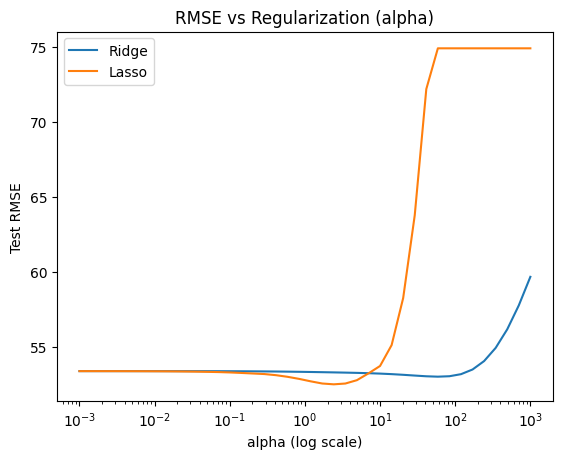

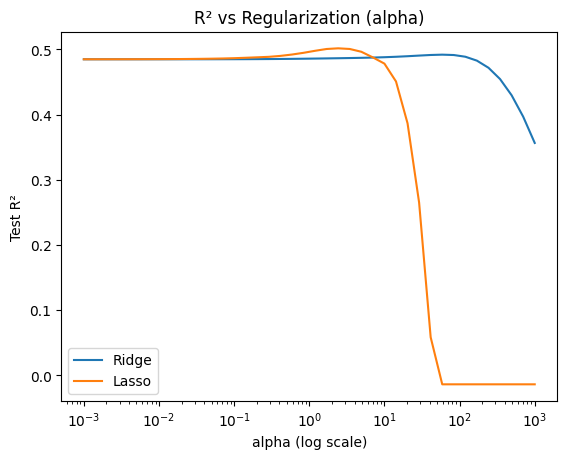

In [9]:
alphas = np.logspace(-3, 3, 40)

ridge_rmse, lasso_rmse = [], []
ridge_r2,   lasso_r2   = [], []

for a in alphas:
    r = Ridge(alpha=a).fit(X_train_sc, y_train)
    l = Lasso(alpha=a, max_iter=10000, random_state=42).fit(X_train_sc, y_train)

    ridge_rmse.append(np.sqrt(mean_squared_error(y_test, r.predict(X_test_sc))))
    lasso_rmse.append(np.sqrt(mean_squared_error(y_test, l.predict(X_test_sc))))
    
    ridge_r2.append(r2_score(y_test, r.predict(X_test_sc)))
    lasso_r2.append(r2_score(y_test, l.predict(X_test_sc)))

# RMSE vs alpha
plt.figure()
plt.plot(alphas, ridge_rmse, label="Ridge")
plt.plot(alphas, lasso_rmse, label="Lasso")
plt.xscale("log")
plt.xlabel("alpha (log scale)")
plt.ylabel("Test RMSE")
plt.title("RMSE vs Regularization (alpha)")
plt.legend()
plt.show()

# R^2 vs alpha
plt.figure()
plt.plot(alphas, ridge_r2, label="Ridge")
plt.plot(alphas, lasso_r2, label="Lasso")
plt.xscale("log")
plt.xlabel("alpha (log scale)")
plt.ylabel("Test R²")
plt.title("R² vs Regularization (alpha)")
plt.legend()
plt.show()

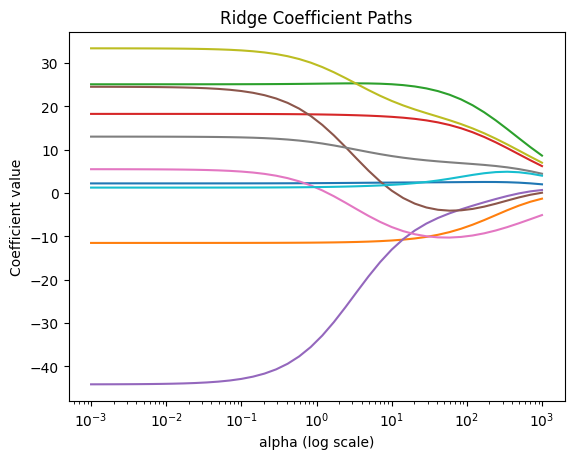

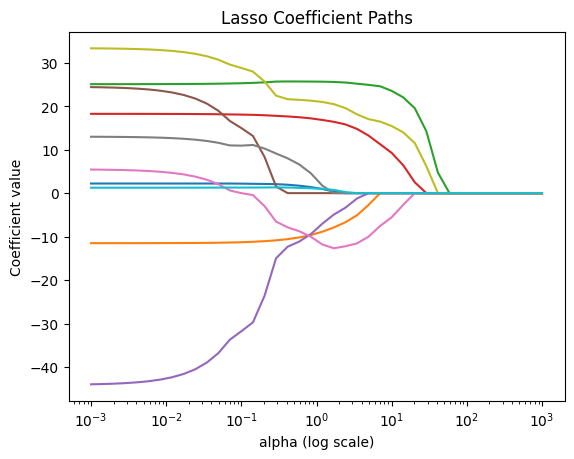

In [10]:
def coefficient_path(model_type="ridge", alphas=np.logspace(-3, 3, 40)):
    coefs = []
    for a in alphas:
        if model_type == "ridge":
            m = Ridge(alpha=a)
        else:
            m = Lasso(alpha=a, max_iter=10000, random_state=42)
        m.fit(X_train_sc, y_train)
        coefs.append(m.coef_)
    coefs = np.array(coefs)

    plt.figure()
    for j, feat in enumerate(X.columns):
        plt.plot(alphas, coefs[:, j], label=feat)
    plt.xscale("log")
    plt.xlabel("alpha (log scale)")
    plt.ylabel("Coefficient value")
    plt.title(f"{model_type.capitalize()} Coefficient Paths")
    # To avoid a huge legend covering the plot, comment the next line if it feels cluttered
    # plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()

coefficient_path("ridge")
coefficient_path("lasso")

In [11]:
coef_df = pd.DataFrame({
    "feature": X.columns,
    "ridge_coef": ridge_best.coef_,
    "lasso_coef": lasso_best.coef_
}).sort_values("ridge_coef", key=lambda s: s.abs(), ascending=False)

zeros_in_lasso = np.sum(lasso_best.coef_ == 0.0)

display(coef_df)
print(f"Number of zeroed coefficients in Lasso: {zeros_in_lasso} / {len(X.columns)}")

,feature,ridge_coef,lasso_coef
4,s1,-31.426888,-31.586344
8,s5,28.491079,28.729047
2,bmi,25.245987,25.303494
3,bp,18.090753,18.066121
5,s2,14.574623,14.782315
1,sex,-11.411956,-11.282583
7,s4,11.209250,10.988953
0,age,2.290848,2.177213
9,s6,1.403421,1.284573
6,s3,-0.030466,-0.000000


Number of zeroed coefficients in Lasso: 1 / 10
